In [2]:
!pip install tensorflow matplotlib
# 导入必要库
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 使用 TensorFlow 和 Keras 进行图像分类

在这个示例中，使用 TensorFlow 和 Keras 构建一个简单的卷积神经网络（CNN），并对 CIFAR-10 数据集进行图像分类。


### 说明

1. **导入库**：导入 `tensorflow`、`matplotlib` 等必要的库。
2. **加载和预处理数据**：使用 `datasets.cifar10.load_data()` 加载 CIFAR-10 数据集，并将像素值归一化到 `[0, 1]` 范围。
3. **构建模型**：构建了一个简单的卷积神经网络（CNN），包括几个卷积层和池化层，最后是全连接层。
4. **编译和训练模型**：使用 Adam 优化器和稀疏分类交叉熵损失函数编译模型，并进行训练。
5. **评估模型**：在测试集上评估模型的准确性。
6. **绘制训练和验证准确率**：绘制训练和验证准确率及损失的变化曲线，以了解模型的表现。

### 示例数据 (`CIFAR-10`)

CIFAR-10 是一个公开的标准数据集，包含了 60000 张 32x32 的彩色图像，分为 10 类，每类有 6000 张图像。TensorFlow 提供了方便的方法来直接加载这个数据集。

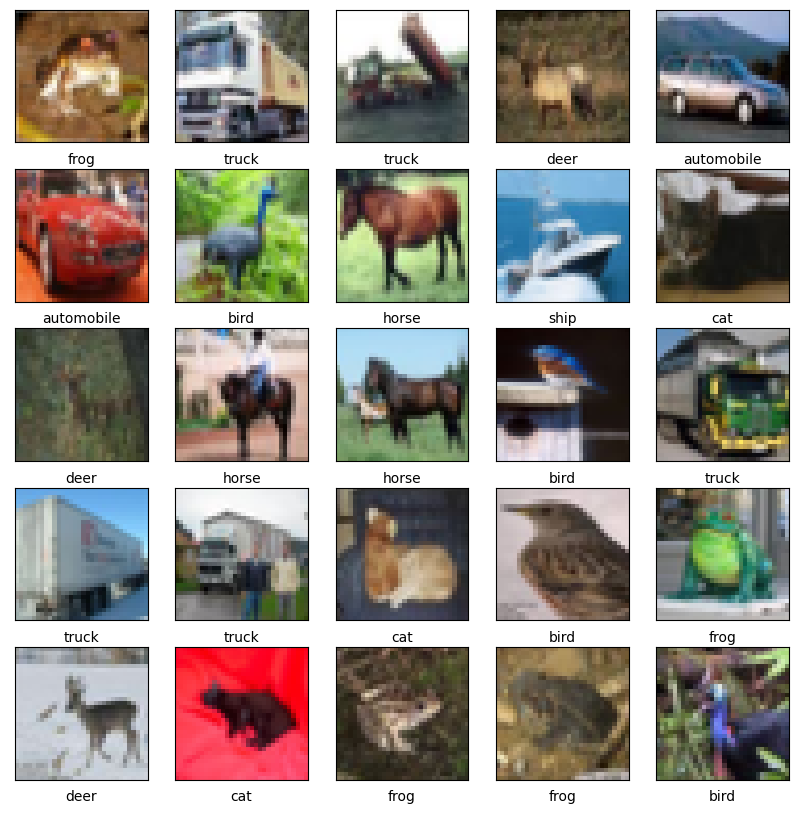

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 将像素值归一化到 [0, 1] 范围
train_images, test_images = train_images / 255.0, test_images / 255.0

# 显示一些训练图像
class_names = ['airplane', 'automobile',
               'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # CIFAR-10 标签是数组形式，因此需要取第一个元素
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 构建模型

### 将构建一个简单的卷积神经网络（CNN）来对这些图像进行分类。

In [4]:
model = models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),  # 使用 Input 层定义输入形状
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# 查看模型架构
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## 编译和训练模型

### 接下来编译并训练模型。

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True
              ),
              metrics=['accuracy'])

history = model.fit(train_images,
                    train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3351 - loss: 1.7979 - val_accuracy: 0.5416 - val_loss: 1.2714
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5765 - loss: 1.1942 - val_accuracy: 0.5994 - val_loss: 1.1181
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6387 - loss: 1.0252 - val_accuracy: 0.6508 - val_loss: 1.0017
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6837 - loss: 0.9063 - val_accuracy: 0.6683 - val_loss: 0.9547
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7124 - loss: 0.8207 - val_accuracy: 0.6864 - val_loss: 0.9150
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7308 - loss: 0.7703 - val_accuracy: 0.6919 - val_loss: 0.9103
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7476 - loss: 0.7202 - val_accuracy: 0.6995 - val_loss: 0.8842
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7622 -

## 评估模型

### 训练完成后，可以评估模型在测试集上的性能。

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.7153 - loss: 0.8671

Test accuracy: 0.7153000235557556


## 绘制训练和验证准确率

### 为了更好地理解模型的表现，可以绘制训练和验证准确率的变化曲线。

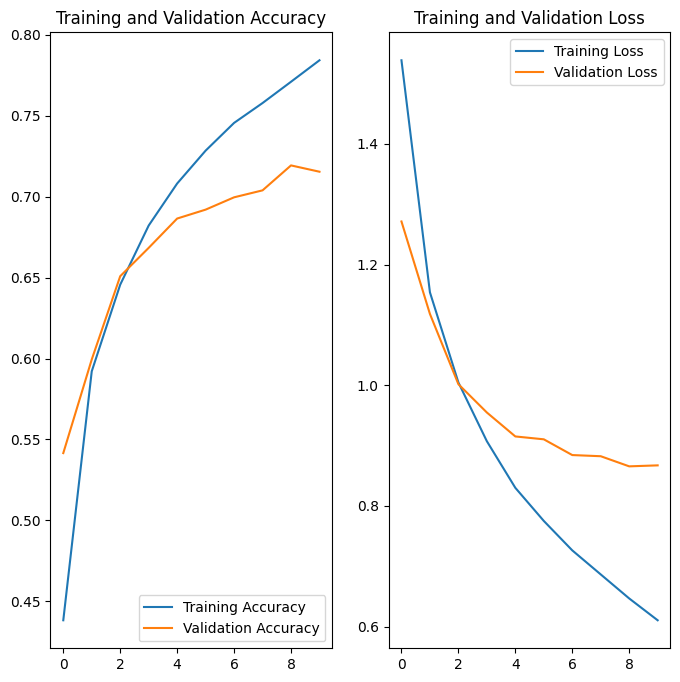

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()